# 0. Install and Import Dependencies

In [25]:
pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python matplotlib

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow==2.4.1 (from versions: 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0, 2.6.1, 2.6.2, 2.6.3, 2.6.4, 2.6.5, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.1, 2.7.2, 2.7.3, 2.7.4, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.1, 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0)
ERROR: No matching distribution found for tensorflow==2.4.1


In [2]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import cv2

# 1. Load Model

In [3]:
interpreter = tf.lite.Interpreter(model_path=r"C:\Users\user\Downloads\MoveNetLightning-main\MoveNetLightning-main\3.tflite")
interpreter.allocate_tensors()

# 2. Make Detections

In [4]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret,frame = cap.read()
    cv2.imshow('Movenet Lightning',frame)
    if cv2.waitKey(5) & 0xFF ==ord('q'):
        break
cap.release()
cv2.destroyAllWindows()


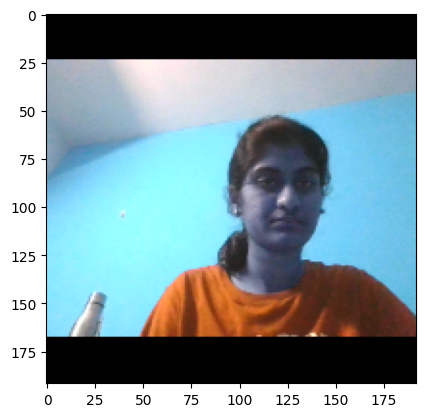

In [24]:
plt.imshow(tf.cast(np.squeeze(img), dtype=tf.int32))

In [5]:
img = frame.copy()

In [6]:
img.shape

(480, 640, 3)

In [7]:
interpreter.get_output_details()

[{'name': 'StatefulPartitionedCall:0',
  'index': 312,
  'shape': array([ 1,  1, 17,  3]),
  'shape_signature': array([ 1,  1, 17,  3]),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [34]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Reshape image
    img = frame.copy()
    img = tf.image.resize_with_pad(np.expand_dims(img, axis=0), 192,192)
    input_image = tf.cast(img, dtype=tf.float32)
    
    # Setup input and output 
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()
    
    # Make predictions 
    interpreter.set_tensor(input_details[0]['index'], (input_image))
    interpreter.invoke()
    keypoints_with_scores = interpreter.get_tensor(output_details[0]['index'])
    print(keypoints_with_scores)
    
    # Rendering 
    draw_connections(frame, keypoints_with_scores, EDGES, 0.4)
    draw_keypoints(frame, keypoints_with_scores, 0.4)
    
    cv2.imshow('MoveNet Lightning', frame)
    
    if cv2.waitKey(10) & 0xFF==ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

[[[[0.6175915  0.60599154 0.700758  ]
   [0.57978445 0.63981175 0.6085429 ]
   [0.57953584 0.56219363 0.60667926]
   [0.61288    0.6778799  0.73316395]
   [0.6183988  0.49819455 0.75055265]
   [0.8376591  0.7788664  0.6162975 ]
   [0.8220223  0.37894422 0.8509625 ]
   [0.9624958  0.8641274  0.05528542]
   [0.96347535 0.29264563 0.04196392]
   [0.85818195 0.65880406 0.0978775 ]
   [0.86625254 0.42924106 0.05617572]
   [1.0266558  0.7210094  0.0108575 ]
   [1.0204217  0.4940477  0.00863838]
   [0.8515296  0.8310677  0.04833316]
   [0.82364917 0.36749706 0.07440588]
   [0.86179936 0.8398622  0.00445497]
   [0.867207   0.42497325 0.0086864 ]]]]
[[[[0.6185264  0.6073425  0.7050379 ]
   [0.5802603  0.6399251  0.6087053 ]
   [0.5800619  0.56289244 0.5717604 ]
   [0.6143159  0.67545074 0.7121705 ]
   [0.61937827 0.4981353  0.7370093 ]
   [0.8393356  0.777157   0.625291  ]
   [0.8256041  0.37738937 0.66352427]
   [0.9592275  0.85230196 0.04994537]
   [0.9628923  0.29429895 0.04107168]
   [0.859

In [31]:
right_eye = keypoints_with_scores[0][0][2]
left_elbow = keypoints_with_scores[0][0][7]

In [32]:
shaped = np.squeeze(np.multiply(interpreter.get_tensor(interpreter.get_output_details()[0]['index']), [480,640,1]))

In [33]:
for kp in shaped:
    ky, kx, kp_conf = kp
    print(int(ky), int(kx), kp_conf)

247 421 0.7467997074127197
220 452 0.41933831572532654
219 379 0.5358763933181763
240 475 0.6351528763771057
242 327 0.7246270775794983
362 560 0.7431058287620544
357 235 0.8030608892440796
422 623 0.01984339766204357
458 191 0.007299073506146669
340 520 0.007007397711277008
393 307 0.006451188120990992
487 527 0.005971699487417936
190 309 0.0053462982177734375
377 608 0.016920607537031174
343 235 0.032454103231430054
310 661 0.004239209461957216
311 315 0.0012961947359144688


# 3. Draw Keypoints

In [26]:
def draw_keypoints(frame, keypoints, confidence_threshold):
    y, x, c = frame.shape
    shaped = np.squeeze(np.multiply(keypoints, [y,x,1]))
    
    for kp in shaped:
        ky, kx, kp_conf = kp
        if kp_conf > confidence_threshold:
            cv2.circle(frame, (int(kx), int(ky)), 4, (0,255,0), -1) 

# 4. Draw Edges

In [27]:
EDGES = {
    (0, 1): 'm',
    (0, 2): 'c',
    (1, 3): 'm',
    (2, 4): 'c',
    (0, 5): 'm',
    (0, 6): 'c',
    (5, 7): 'm',
    (7, 9): 'm',
    (6, 8): 'c',
    (8, 10): 'c',
    (5, 6): 'y',
    (5, 11): 'm',
    (6, 12): 'c',
    (11, 12): 'y',
    (11, 13): 'm',
    (13, 15): 'm',
    (12, 14): 'c',
    (14, 16): 'c'
}

In [28]:
shaped[0], shaped[1]


(array([0., 0., 0.]), array([0., 0., 0.]))

In [29]:
for edge, color in EDGES.items():
    p1, p2 = edge
    y1, x1, c1 = shaped[p1]
    y2, x2, c2 = shaped[p2]
    print((int(x2), int(y2)))

(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)


In [30]:
def draw_connections(frame, keypoints, edges, confidence_threshold):
    y, x, c = frame.shape
    shaped = np.squeeze(np.multiply(keypoints, [y,x,1]))
    
    for edge, color in edges.items():
        p1, p2 = edge
        y1, x1, c1 = shaped[p1]
        y2, x2, c2 = shaped[p2]
        
        if (c1 > confidence_threshold) & (c2 > confidence_threshold):      
            cv2.line(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0,0,255), 2)